# Homework 5 Solution

**MECH.5130: Theory of Finite Element Analysis**

Michael N. Olaya

## Problem 1

Connectivity $[G]$ for the assembly, where the row index is the element number and the column index is the associated local node numbers. Each element of the $[G]$ refers to a global node number on an element.

$$
[G] =
\begin{bmatrix}
1 & 2 & 5 \\
3 & 4 & 6 & 5 \\
4 & 7 \\
\end{bmatrix}
$$

## Problem 2

Connectivity $[G]$ for the assembly, where the row index is the element number and the column index is the associated local node numbers. Each element of the $[G]$ refers to a global node number on an element.

$$
[G] =
\begin{bmatrix}
12 & 9 & 10 \\
3 & 8 & 4 & 12 & 6 & 2 & 5 & 1 \\
6 & 7 \\
4 & 11 \\
\end{bmatrix}
$$

## Problem 3

Generally, the "rules" for element/node numbering in Abaqus are:

- Elements numbered in a CCW fashion (top to bottom, right to left)
- Global node numbers applied element-by-element in element order
- Number corner nodes first, then number intermediate nodes
- Preferred numbering per element starts where there is the greatest connectivity for a node that is not yet numbered, applying to both the corner and intermediate node numbering process

## Problem 4

## Problem 5

## Problem 6

In [11]:
import pathlib

import numpy as np
import matplotlib.pyplot as plt

import mfe.baseclasses
import mfe.solve
import mfe.utils
import mfe.load
import mfe.plot

MESH_FILES = {
    'connectivity': pathlib.Path('p6_connectivity.csv'),
    'node_coords': pathlib.Path('p6_nodes.csv')
}

In [7]:
# Get connectivity matrix and nodal coordinates, then assemble the mesh
G, node_coords = mfe.utils.read_mesh_from_csv(**MESH_FILES)
elems = mfe.solve.assemble_mesh(G, node_coords)

# Set the element material property matrix and thickness
D = mfe.baseclasses.Material(E=70000, nu=0.33).D_isotropic_plane_stress()
thickness = 0.3
for e in elems:
    e.D = D.copy()
    e.thickness = thickness

# Set the traction boundary conditions corresponding to elements 1 and 2
loads = [[] for _ in elems]
loads[0] = mfe.load.SurfaceTraction.generate(elems[0], '+y', [np.array([0]), np.array([15])], thickness=elems[0].thickness)
loads[1] = mfe.load.SurfaceTraction.generate(elems[1], '+y', [np.array([0]), np.array([15])], thickness=elems[1].thickness)

# Assemble solution matrices
K, F = mfe.solve.assemble_global_solution(G, elems, loads, 2)

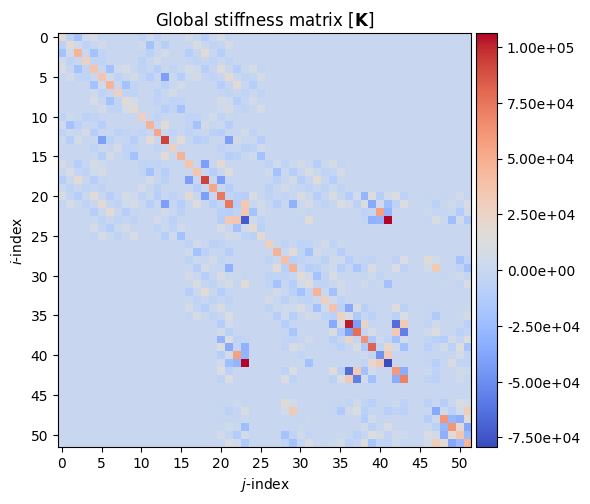

In [10]:
# Plot solution
fig, ax = plt.subplots(figsize=(6, 6))
cbar = mfe.plot.plot_stiffness_heatmap(fig, ax, K, cmap='coolwarm', label_every=5)
ax.set_title(r'Global stiffness matrix $[\mathbf{K}]$')
fig.tight_layout()